# Part 0: Reading the data
### Please find the data (Fytlyff_DS_Interview.csv) and read it as a Dataframe
### Observe the column names and the data types in each column. 

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy
from numpy import int64
from numpy import float64
from numpy import inf
import matplotlib.pyplot as mp
from functools import reduce
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv('Fytlyff_DS_Interview.csv',encoding = "cp1252")

In [4]:
dataframe.head()#Showing the dataframes

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


In [5]:
dataframe.dtypes #to get the data types of the columns with their column name

Year                                                                                                                           int64
Month                                                                                                                         object
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
How_many_Landed_on_our_Page?                                                                                                 float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

# Part 1: Data cleaning
#### ●Write a function called data_cleaning() which, when called, would perform the following activity:
#### 1.Replaces the NA values with 0s in the data
#### 2.In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…
#### 3.In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic” 

In [6]:
def data_cleaning(df):
    df.fillna(0,inplace=True) #To replace the NaN values with 0
    
    df['Month'] = df['Month'].replace(['Jan'],1)  #To replace Jan with 1, feb with 2, march with 3 and so on…
    df['Month'] = df['Month'].replace(['Feb'],2)
    df['Month'] = df['Month'].replace(['Mar'],3)
    df['Month'] = df['Month'].replace(['Apr'],4)
    df['Month'] = df['Month'].replace(['May'],5)
    df['Month'] = df['Month'].replace(['Jun'],6)
    df['Month'] = df['Month'].replace(['Jul'],7)
    df['Month'] = df['Month'].replace(['Aug'],8)
    df['Month'] = df['Month'].replace(['Sep'],9)
    df['Month'] = df['Month'].replace(['Oct'],10)
    df['Month'] = df['Month'].replace(['Nov'],11)
    df['Month'] = df['Month'].replace(['Dec'],12)
    
     #To replace Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic”
    df['Where_Are_They_comming_from?'] = df['Where_Are_They_comming_from?'].replace(['Came_From_Google'],'Google')
    df['Where_Are_They_comming_from?'] = df['Where_Are_They_comming_from?'].replace(['Landed_on_the_page_Directly'],'Direct_traffic')
          


In [7]:
data_cleaning(dataframe)
dataframe.head(1000)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033
...,...,...,...,...,...,...,...,...,...,...
995,2020,5,Mobile_website,Existing_Customer,Direct_traffic,Bangalore,0.0,0.0,104332,38364
996,2020,5,Mobile_website,Existing_Customer,Direct_traffic,Chennai,0.0,0.0,232367,100678
997,2020,5,Mobile_website,Existing_Customer,Direct_traffic,Dehradun,0.0,0.0,108726,17779
998,2020,5,Mobile_website,Existing_Customer,Direct_traffic,Indore,0.0,0.0,422844,126231


# Part 2: Descriptive statistics

#### ●Write a function called descriptive_stats() which, when called, would perform the following activity:
#### 1.Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns
#### 2.Produce a list of all the unique values & data types present in the non-numeric columns

In [8]:
def descriptive_stats(df):
    List=[]
    Column_names= df.columns.to_list()
    for i in Column_names:
        if df[i].dtypes== int64 or df[i].dtypes==float64 :
            print("The mean value for the column named ",i,"is",df[i].mean(),"\n")
         
            print("The Standard Deviation value for the column named ",i,"is",df[i].std(),"\n")
         
            print("The median value for the column named ",i,"is",df[i].median(),"\n")
            
            
            print("The Quantile value for the column named ",i,"is","\n")
            print(df[i].quantile([0.25,0.5,0.75]),"\n")
            
        else:
            print("*** The column name",i,"is a non numeic column.Hence the unique values are",df[i].unique(),"\n")
            List.append(df[i].dtypes)
           
            
    Unique = set(List)
    print(" ####### The unique data types of non numeric columns are" ,Unique ,"#######")
            
descriptive_stats(dataframe)

The mean value for the column named  Year is 2020.0 

The Standard Deviation value for the column named  Year is 0.8166856504175655 

The median value for the column named  Year is 2020.0 

The Quantile value for the column named  Year is 

0.25    2019.0
0.50    2020.0
0.75    2021.0
Name: Year, dtype: float64 

The mean value for the column named  Month is 6.5 

The Standard Deviation value for the column named  Month is 3.452851893335938 

The median value for the column named  Month is 6.5 

The Quantile value for the column named  Month is 

0.25    3.75
0.50    6.50
0.75    9.25
Name: Month, dtype: float64 

*** The column name MobileWeb_or_Web is a non numeic column.Hence the unique values are ['Desktop_Website' 'Mobile_website'] 

*** The column name Type_of_Customers? is a non numeic column.Hence the unique values are ['Existing_Customer' 'New_Customer'] 

*** The column name Where_Are_They_comming_from? is a non numeic column.Hence the unique values are ['Google' 'Direct_traf

# Part 3: Prescriptive statistics
#### ●Can you write code and present the data which would help us answer (Text in “” are column names) :
#### 1.“Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”
#### 2.“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”  

In [9]:
df=dataframe.groupby(['Which_Place_in_India?'])['How_many_Landed_on_our_Page?'].sum()
print(df)
df[:,].idxmax()#Return index of first occurrence of maximum over requested axis.


Which_Place_in_India?
Bangalore     51255804.0
Chennai      132052059.0
Dehradun      62484684.0
Indore       282329031.0
Pune         319132898.0
Name: How_many_Landed_on_our_Page?, dtype: float64


'Pune'

In [10]:

dataframe['Query'] = dataframe['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/dataframe['How_many_Landed_on_our_Page?']
dataframe.head(2000)


,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,Query
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178,inf
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916,inf
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461,inf
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667,inf
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033,inf
...,...,...,...,...,...,...,...,...,...,...,...
1995,2021,10,Desktop_Website,New_Customer,Google,Bangalore,86791.0,48493.0,29719,22893,0.263772
1996,2021,10,Desktop_Website,New_Customer,Google,Chennai,453170.0,249100.0,157389,112074,0.247311
1997,2021,10,Desktop_Website,New_Customer,Google,Dehradun,115322.0,64086.0,34242,23973,0.207879
1998,2021,10,Desktop_Website,New_Customer,Google,Indore,469986.0,253407.0,160055,106836,0.227317


In [11]:
dataframe['Query'] = dataframe['Query'].replace([inf],0) #CHANGED INFINITY VALUES WITH O 

df1=dataframe.groupby(['Which_Place_in_India?'])['Query'].sum()
print(df1)
df1[:,].idxmax()

Which_Place_in_India?
Bangalore    32.240055
Chennai      30.745497
Dehradun     24.911209
Indore       36.588415
Pune         27.896745
Name: Query, dtype: float64


'Indore'

# Part 4: Simple Machine learning questions
#### ●Write a function called pred_future() which, when called, would perform the following activity:
#### 1.Predict “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the complete year of 2022
#### 2.Generate the overall MAPE of your prediction for the year 2021. 
#### You may use linear regression, Huber regression, ARIMA or prophet. 

In [13]:
Prediction_data = pd.read_csv('Query_Against_Date.csv',encoding = "cp1252")

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:


from sklearn.model_selection import train_test_split

ValueError: could not convert string to float: '2019-2'

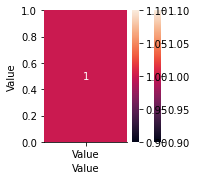

In [16]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
df = pd.read_csv('Query_Against_Date.csv',encoding = "cp1252")


sns.pairplot(df)

sns.distplot(df['Value'])



df.columns

x = df['_Final_Date']
       
y = df['Value']     


#Split the data

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=101)

#Now we have training and testing data
#Let's proceed further

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)
#Now LinearRegression model has trained 

#Evaluate our model
#Print the intercept

print(lm.intercept_)


#Print the coefficient 

print(lm.coef_)


cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])
cdf


#Now let's try some prediction

predictions = lm.predict(x_test)
predictions

#y_test contains correct VALUES 

plt.scatter(y_test, predictions)

#Regression evaluation matrix 

from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)



# MAPE Evaluation

In [ ]:


#Regression evaluation matrix 

from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)


# TRYNING ANOTHER APPROCAH

In [17]:
from sklearn.linear_model import LinearRegression
df['_Final_Date'] = pd.to_datetime(df['_Final_Date'], format="%Y/%m")


X = ((df._Final_Date).to_numpy()).reshape((-1, 1))  # put your dates in here
y = df.Value # put your kwh in here

model = LinearRegression()
model.fit(X, y)
X_predict1 = [2022-2,2022-3,2022-4,2022-5,2022-6,2022-7,2022-8,2022-9,2022-10,2022-11,2022-12]
arr = numpy.array(X_predict1) 
X_predict=arr.reshape(-1, 1)
# put the dates of which you want to predict kwh here
y_predict = model.predict(X_predict)


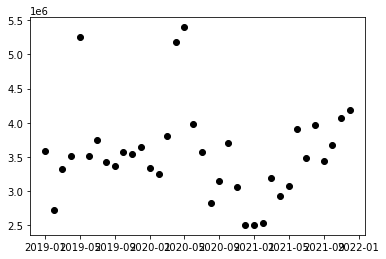

In [18]:

plt.scatter(X, y,  color='black')

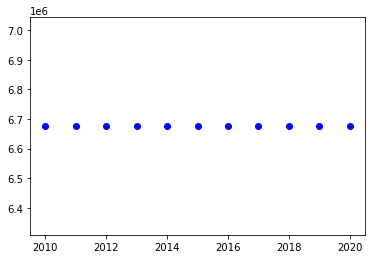

In [19]:

plt.scatter(X_predict, y_predict, color='blue', linewidth=1)

In [20]:
result = adfuller(df['Value'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.9896121136675826
p-value: 0.035875952011252064
Critical Values:
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377


In [21]:
import statsmodels.api as sm

In [22]:
Prediction_data.head()

,_Final_Date,Value
0,2019-1,3589410.0
1,2019-2,2717346.0
2,2019-3,3322524.0
3,2019-4,3508967.0
4,2019-5,5260855.0


# TRYING ARIMA MODEL

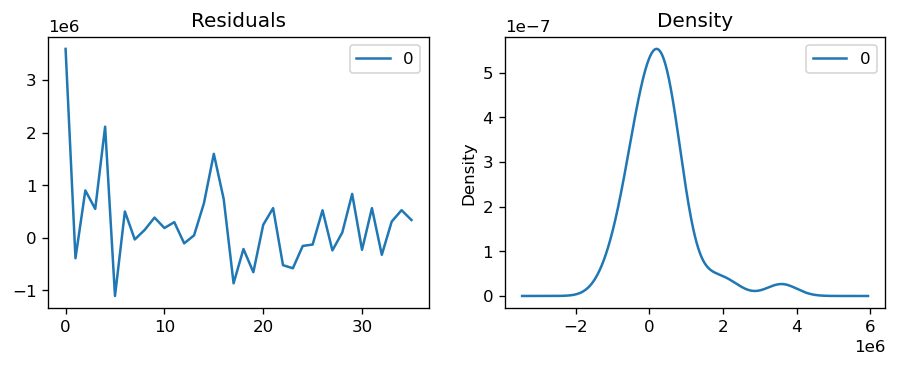

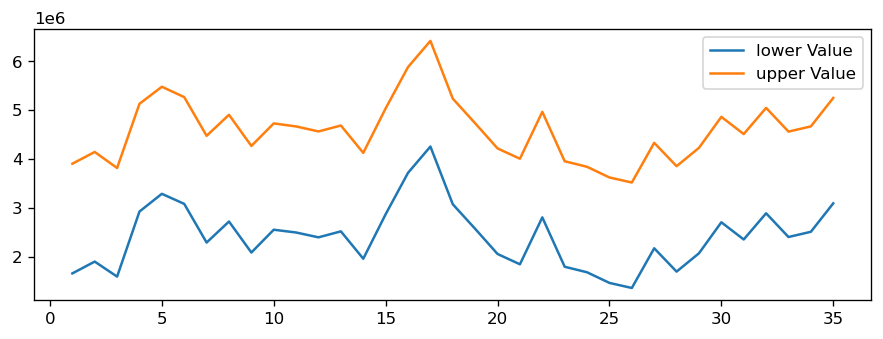

In [25]:
df=Prediction_data
mymodel =sm.tsa.arima.ARIMA(df.Value, order=(1,1,1)) 
modelfit = mymodel.fit()#   disp=0
# Plotting Residual Errors
myresiduals = pd.DataFrame(modelfit.resid)
fig, ax = plt.subplots(1, 2)
myresiduals.plot(title="Residuals", ax=ax[0])
myresiduals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})
mymodel =sm.tsa.arima.ARIMA(df.Value, order=(2,1,3)) 
modelfit = mymodel.fit()#   disp=0
modelfit.get_prediction(start=1,dynamic = False).conf_int().plot()
plt.show()

# Part 5: Visualization
#### ●Please write a code to display :
#### 1.A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020. (Hint : On x axis there should be months for 2019 & 2020 and Y axis should be the “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” and there should different lines depicting different regions of  “Which_Place_in_India?”)
#### 2.A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the months of the year 2021(Actuals values) & 2022 (Predicted values). (Hint : It should be a line graph)

In [26]:
cols=["Year","Month"]
dataframe['_Final_Date'] = dataframe[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dataframe.groupby(['_Final_Date','Which_Place_in_India?'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()


How_many_Landed_on_the_our_Page_and_clicked_on_a_button?
_Final_Date Which_Place_in_India?                                                          
2019-1      Bangalore                                                       616082.0       
            Chennai                                                         514661.0       
            Dehradun                                                        730669.0       
            Indore                                                         4802600.0       
            Pune                                                           2605342.0       
...                                                                              ...       
2021-9      Bangalore                                                       671656.0       
            Chennai                                                        3365736.0       
            Dehradun                                                       1078322.0       
            Indore                                                         4593155.0       
            Pune                                                           3965138.0       

[180 rows x 1 columns]

In [27]:
dataframe.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,Query,_Final_Date
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178,0.0,2019-1
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916,0.0,2019-1
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461,0.0,2019-1
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667,0.0,2019-1
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033,0.0,2019-1


In [28]:
df_new = dataframe[dataframe['Which_Place_in_India?'] == 'Bangalore']

df_new2 = dataframe[dataframe['Which_Place_in_India?'] == 'Pune']

df_new3 = dataframe[dataframe['Which_Place_in_India?'] == 'Indore']

df_new4 = dataframe[dataframe['Which_Place_in_India?'] == 'Dehradun']

df_new5 = dataframe[dataframe['Which_Place_in_India?'] == 'Chennai']



In [29]:
df_new2.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,Query,_Final_Date
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033,0.000000,2019-1
9,2019,1,Desktop_Website,Existing_Customer,Direct_traffic,Pune,0.0,0.0,531346,101317,0.000000,2019-1
14,2019,1,Desktop_Website,Existing_Customer,Unidentified_Sources,Pune,0.0,0.0,120090,20223,0.000000,2019-1
19,2019,1,Desktop_Website,New_Customer,Google,Pune,383260.0,305902.0,172827,122285,0.319065,2019-1
24,2019,1,Desktop_Website,New_Customer,Direct_traffic,Pune,1748075.0,854377.0,314289,225823,0.129184,2019-1


In [30]:
df_new2=df_new2.drop(['MobileWeb_or_Web', 'Type_of_Customers?','Where_Are_They_comming_from?','How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','Query'], axis=1)
df_new=df_new.drop(['MobileWeb_or_Web', 'Type_of_Customers?','Where_Are_They_comming_from?','How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','Query'], axis=1)
df_new3=df_new3.drop(['MobileWeb_or_Web', 'Type_of_Customers?','Where_Are_They_comming_from?','How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','Query'], axis=1)
df_new4=df_new4.drop(['MobileWeb_or_Web', 'Type_of_Customers?','Where_Are_They_comming_from?','How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','Query'], axis=1)
df_new5=df_new5.drop(['MobileWeb_or_Web', 'Type_of_Customers?','Where_Are_They_comming_from?','How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','Query'], axis=1)

In [31]:
df_new2=df_new2.groupby(['_Final_Date'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()
df_new3=df_new3.groupby(['_Final_Date'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()
df_new4=df_new4.groupby(['_Final_Date'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()
df_new5=df_new5.groupby(['_Final_Date'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()
df_new=df_new.groupby(['_Final_Date'])[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"]].sum()

In [32]:
df_new5.head(40)


,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?
_Final_Date,
2019-1,514661.0
2019-10,1982593.0
2019-11,1877019.0
2019-12,1677880.0
2019-2,480165.0
2019-3,479740.0
2019-4,475145.0
2019-5,497355.0
2019-6,505969.0


In [ ]:
Chennai = df_new5["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].to_numpy()
Dehradun = df_new4["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].to_numpy()
Indore = df_new3["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].to_numpy()
Pune = df_new2["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].to_numpy()
Bangalore = df_new5["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].to_numpy()

In [ ]:
print(Chennai)
print(Dehradun)
print(Indore)
print(Pune)
print(Bangalore)

In [ ]:
df = pd.DataFrame({
   'Bangalore': [ 514661,   480165,  479740,  475145,  497355,
                  505969, 1208407, 1938438,1982593, 1877019, 1677880, 1877382,  1511908,
                 1338491, 1590696, 1994850, 2007262, 1797365, 1539207, 1413855,1471801, 2187835, 1778341, 1609716,
                 2920645, 1422997, 1338830, 1389115, 1611854,
                 1698377, 2947538, 3677196, 3365736, 1072228, 3164755, 3763541,],
   'Pune': [2605342,  2366556, 2530053, 2651561, 2485021,
             2443483, 2702061, 2666274, 2438500,2839994, 2858039, 3389593, 3655194, 
             2326177, 2437599, 3787012, 4397372, 3000737, 3257855, 2873408, 3503920,5404187, 4469941, 2232601,
             1816762, 2064928, 2609871, 3873993, 3890712,
             5631309, 3323737, 4433800, 3965138, 4872540, 6291692, 5126383,],
    'Indore':[4802600, 4292200, 4603993, 4608514, 5740085,
             4578019, 4008077, 3559303, 3710775,  4035336, 3678396, 3617632,2882182, 
             2961381, 3414893, 4132432, 4051707, 4007734, 4975073, 3914735, 3671359,3928393, 3426053, 3192927,
             3126745, 3076480, 3922123, 4533156, 5256854,
             4727031, 4609320, 5150418, 4593155, 4891294, 6454322, 7589394,],
   'Dehradun': [ 730669,  688767,  754543,  818889, 1674226,
  775365,  791713,  816149,  843244,   945884,  848184,  787750, 592341, 
  574987,  711156,  821260,  744974,  666113,  676961,  644460,  600600, 731390,  603781,  424290,
  411932,   459370,  471460,  440038,  532339,
  459305,  457103,  613278, 1078322, 730830, 1293556,  728085,],
    'Chennai': [ 514661,   480165,  479740,  475145,  497355,
              505969, 1208407, 1938438, 1877382,1982593, 1877019, 1677880, 1471801, 
             1338491, 1590696, 1994850, 2007262, 1797365, 1539207, 1413855, 1609716,2187835, 1778341, 1511908,
             1072228, 1422997, 1338830, 1389115, 1611854,
             1698377, 2947538, 3677196, 3365736, 3164755, 3763541, 2920645,]
   }, index=[
2019-1,
2019-2,
2019-3,
2019-4,
2019-5,
2019-6,
2019-7,
2019-8,
2019-9,
2019-10,
2019-11,
2019-12,
2020-1,
2020-2,
2020-3,
2020-4,
2020-5,
2020-6,
2020-7,
2020-8,
2020-9,
2020-10,
2020-11,
2020-12,
2021-1,
2021-2,
2021-3,
2021-4,
2021-5,
2021-6,
2021-7,
2021-8,
2021-9,
2021-10,
2021-11,
2021-12
])
lines = df.plot.line()

# Part 6: About the Previous projects
#### Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach Github links if possible.

##### "Good Afternoon Sir,Sir I Have a few projects in machine learning among them only a few directly ressembles in Data Science.
##### I would like to uphold my project which I did on Stock Market Prediction with AR intregating MA model,Where I used Auto 
##### Corelation Func and Partial Auto Corelation Func to get my p,q values of the ar model and  derived the d value from 
##### differencing.Apart from it I have worked with kmeans clustering on IRIS dataset,Prediction House dare,Anomality detection 
##### of creditcards.Here is the link of my github repo, " https://github.com/LamimZakirPronay".At end I would like to add current I am doing a research of "Coherence of Stock Closing Volume with News Paper Sentiment" under Dr Nagesh BHattu ,National Institute of Technology 
##### Andhra Pradesh."